<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/image_generator_no_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-11-27 08:24:02--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  31.0MB/s    in 5.5s    

2023-11-27 08:24:08 (25.8 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [4]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [5]:
import os

# direcotory with out training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# direcotory with out training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [6]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[:10])

train_human_name = os.listdir(train_human_dir)
print(train_human_name[:10])


['horse33-1.png', 'horse33-3.png', 'horse12-9.png', 'horse19-5.png', 'horse06-5.png', 'horse11-7.png', 'horse04-9.png', 'horse31-7.png', 'horse28-0.png', 'horse16-3.png']
['human10-19.png', 'human13-29.png', 'human12-21.png', 'human01-27.png', 'human16-17.png', 'human16-06.png', 'human06-10.png', 'human04-10.png', 'human16-30.png', 'human13-22.png']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

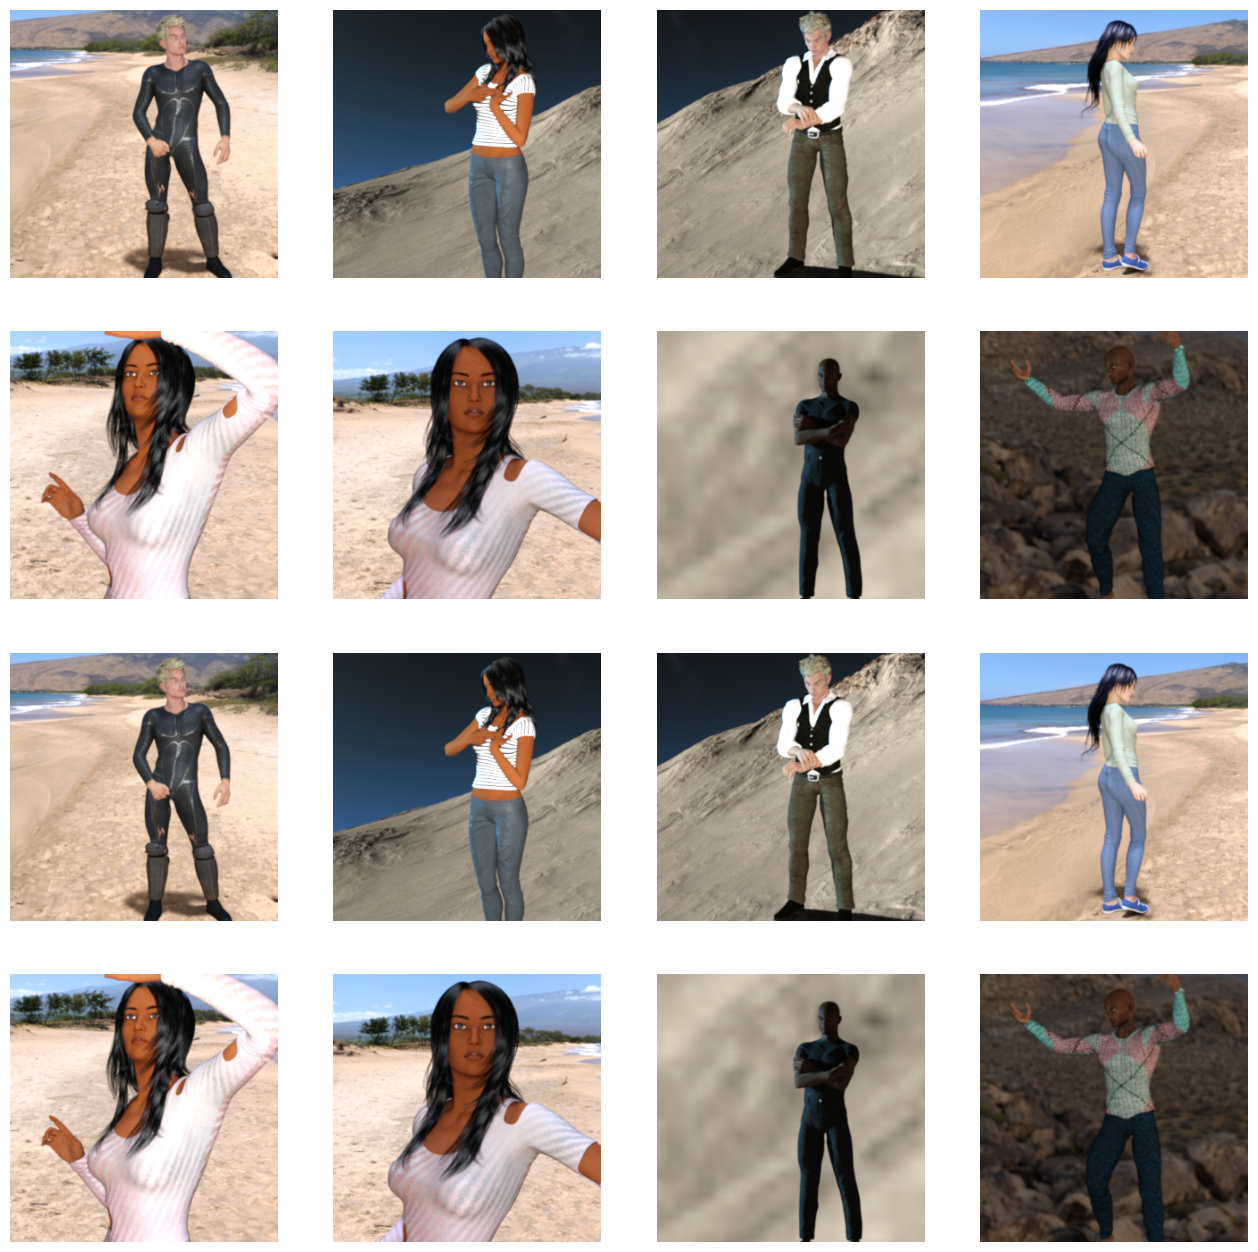

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_name[pic_index-8:pic_index]
                  ]
next_horse_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_name[pic_index-8:pic_index]
                  ]

for i, img_path in enumerate(next_horse_pix + next_horse_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building a Small Model from Scratch

In [9]:
import tensorflow as tf


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

#Data Preprocessing

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


#TRAINING

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 93s 11s/step - loss: 2.1905 - accuracy: 0.5384
Epoch 2/15
1/8 [==>...........................] - ETA: 2s - loss: 0.6530 - accuracy: 0.6667